In [1]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [7]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 103ms/step - loss: 0.5194 - binary_accuracy: 0.7946 - val_loss: 0.3866 - val_binary_accuracy: 0.8684
Epoch 2/20
30/30 [==============================] - 2s 63ms/step - loss: 0.3097 - binary_accuracy: 0.9005 - val_loss: 0.3358 - val_binary_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2250 - binary_accuracy: 0.9269 - val_loss: 0.2913 - val_binary_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1792 - binary_accuracy: 0.9412 - val_loss: 0.2764 - val_binary_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1433 - binary_accuracy: 0.9556 - val_loss: 0.2951 - val_binary_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1186 - binary_accuracy: 0.9643 - val_loss: 0.3136 - val_binary_accuracy: 0.8780
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - lo

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

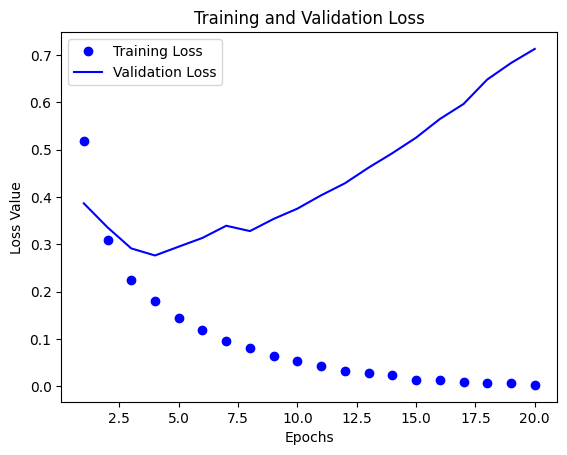

In [11]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

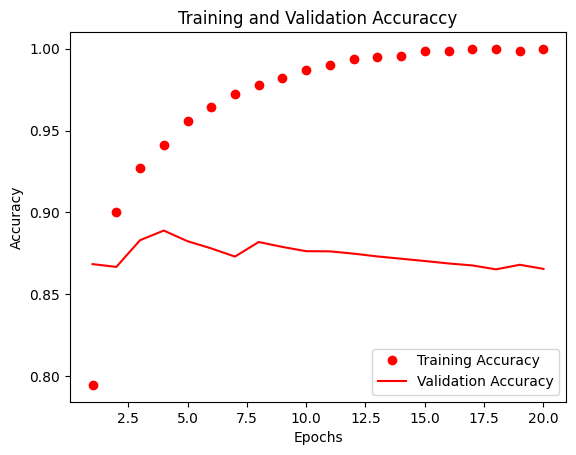

In [12]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
model.fit(partial_X_train,
                   partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 3s 103ms/step - loss: 0.0051 - binary_accuracy: 0.9991 - val_loss: 0.7597 - val_binary_accuracy: 0.8661
Epoch 2/3
30/30 [==============================] - 2s 64ms/step - loss: 0.0015 - binary_accuracy: 0.9999 - val_loss: 0.7815 - val_binary_accuracy: 0.8657
Epoch 3/3
30/30 [==============================] - 2s 67ms/step - loss: 0.0046 - binary_accuracy: 0.9987 - val_loss: 0.8228 - val_binary_accuracy: 0.8652


In [14]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 2s 3ms/step


In [15]:
result

array([[0.00173788],
       [1.        ],
       [0.8464456 ],
       ...,
       [0.00051118],
       [0.00307967],
       [0.4933872 ]], dtype=float32)